,Rank,NCT Number,Title,Acronym,Status,Conditions.1,Conditions.2,Conditions.3,Conditions.4,Conditions.5,...,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations.1,Country,Generalized Condition,Has Chronic Condition,Condition Count,Total Days Taken
0,1.0,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",COVID-19,NaN,NaN,NaN,NaN,...,22/12/20,2021-04-30,08/03/21,08/03/21,"Groupe Hospitalier Paris Saint-Joseph, Paris, ...",France,Respiratory Diseases,1,1,231.0
1,2.0,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,COVID-19,NaN,NaN,NaN,NaN,...,15/12/20,2021-01-29,20/10/20,20/10/20,"Cimedical, Barranquilla, Atlantico",Colombia,Respiratory Diseases,1,1,353.0
2,3.0,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,COVID-19,NaN,NaN,NaN,NaN,...,15/06/21,2021-06-15,20/05/20,09/11/20,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",San Marino,Respiratory Diseases,1,1,345.0
3,4.0,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",COVID-19,NaN,NaN,NaN,NaN,...,31/07/20,2020-08-31,04/06/20,04/06/20,"Hong Kong Sanatorium & Hospital, Hong Kong",Hong Kong,Respiratory Diseases,1,1,98.0
4,5.0,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,Maternal Fetal Infection Transmission,COVID-19,SARS-CoV 2,NaN,NaN,...,01/05/21,2021-01-05,20/05/20,04/06/20,"CHR Orléans, Orléans",France,Respiratory Diseases,1,3,245.0


/var/folders/v2/n4hprq1j3ms3mk9qt0kyzzk40000gn/T/ipykernel_1296/2164833631.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, hue=None, legend=False, palette='viridis')


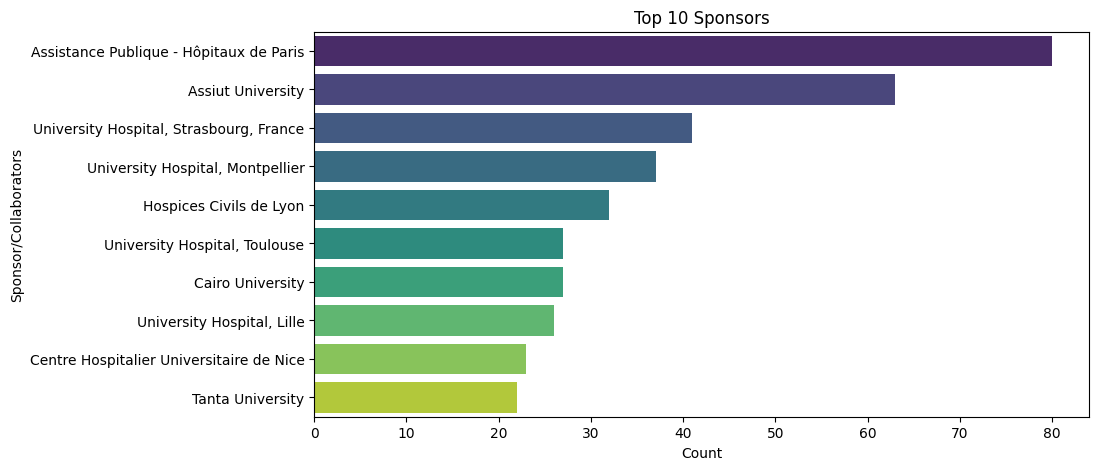

/var/folders/v2/n4hprq1j3ms3mk9qt0kyzzk40000gn/T/ipykernel_1296/2164833631.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, hue=None, legend=False, palette='viridis')


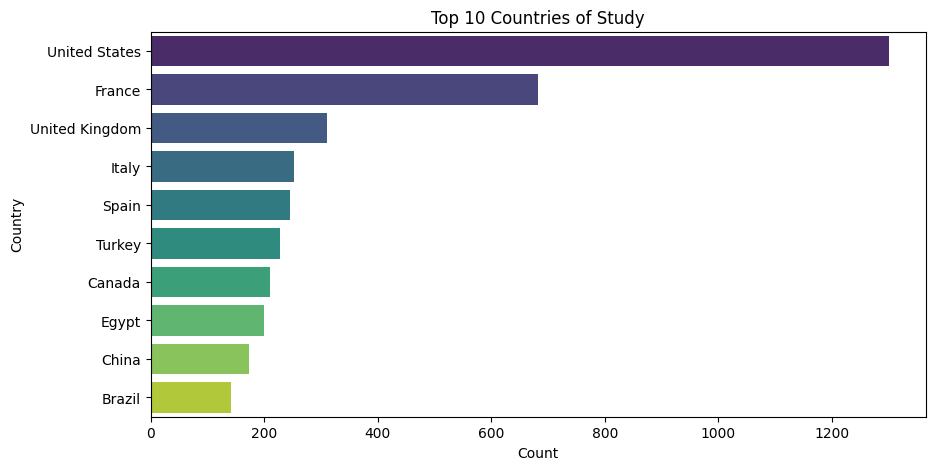

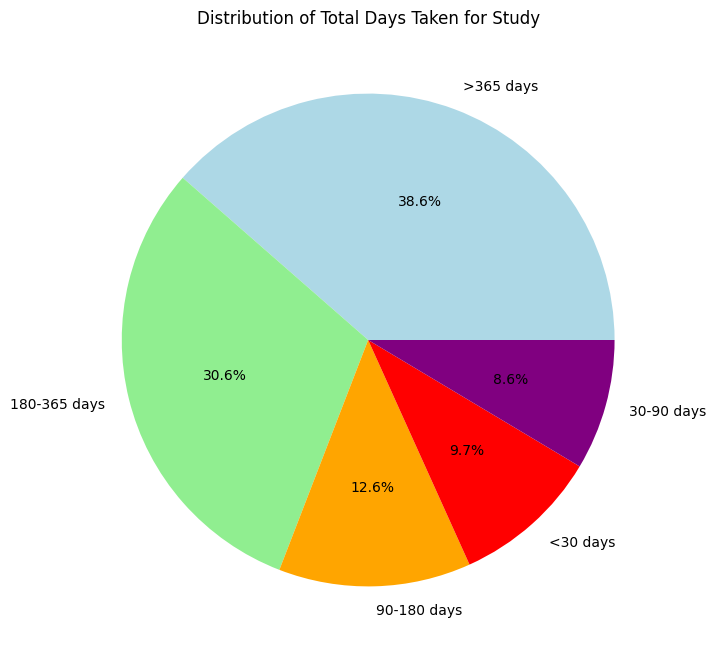

/var/folders/v2/n4hprq1j3ms3mk9qt0kyzzk40000gn/T/ipykernel_1296/2164833631.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_study_types.values, y=top_3_study_types.index, palette='coolwarm')


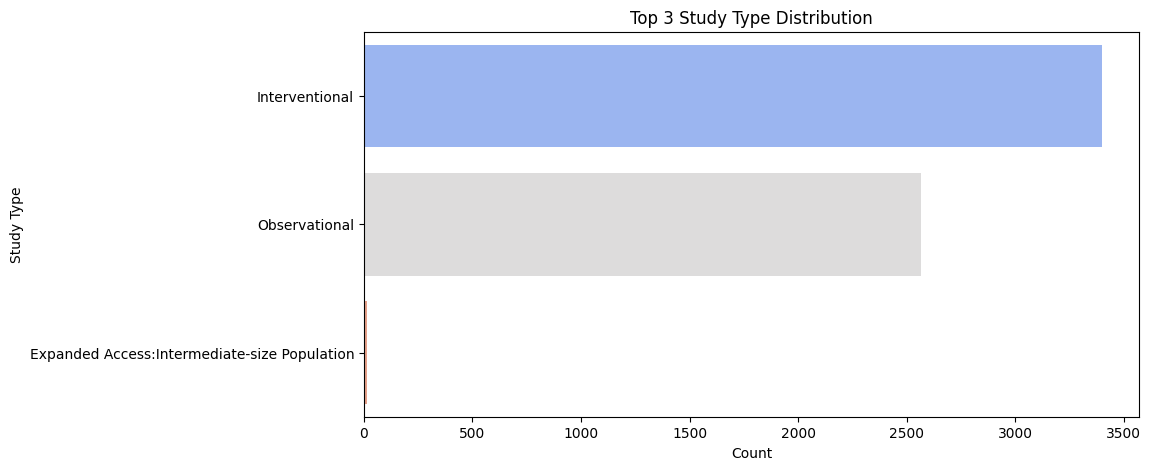

/var/folders/v2/n4hprq1j3ms3mk9qt0kyzzk40000gn/T/ipykernel_1296/2164833631.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


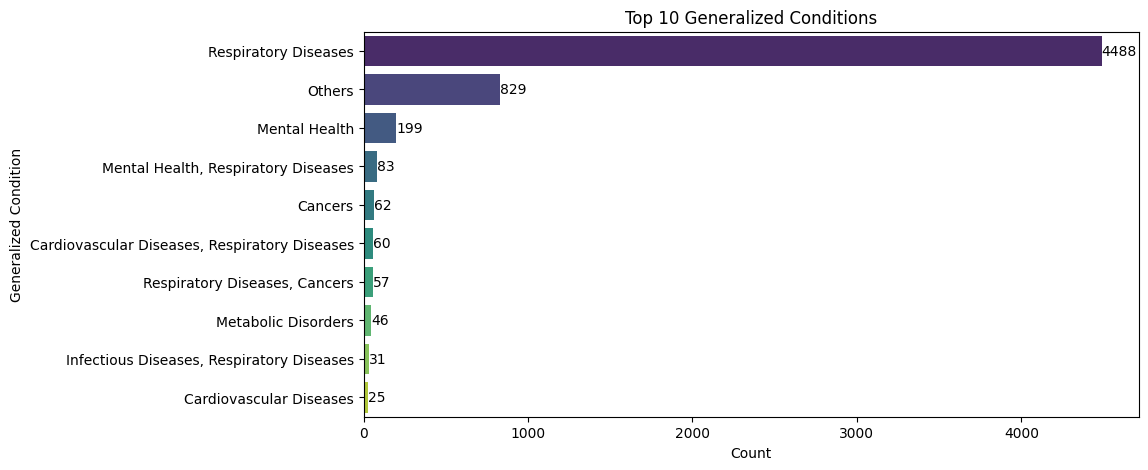

/var/folders/v2/n4hprq1j3ms3mk9qt0kyzzk40000gn/T/ipykernel_1296/2164833631.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='magma')


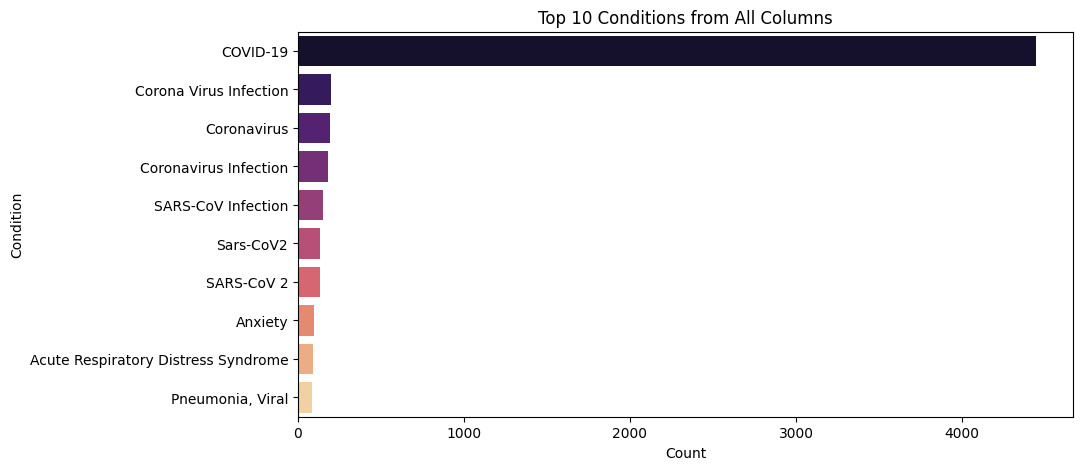

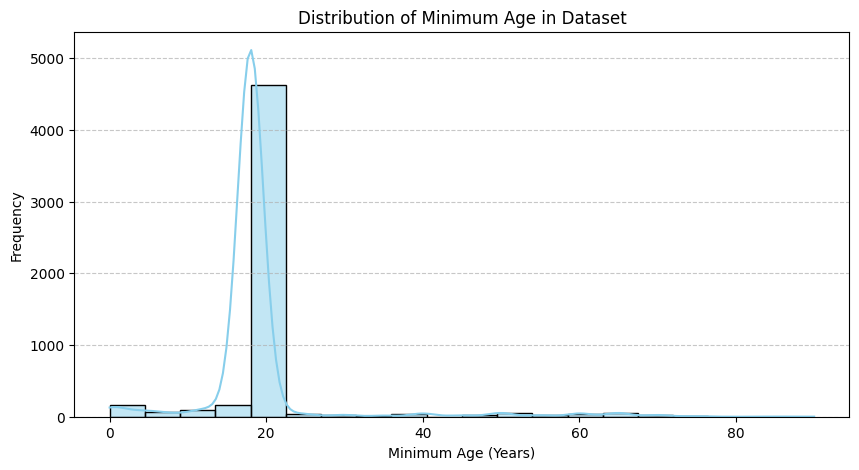

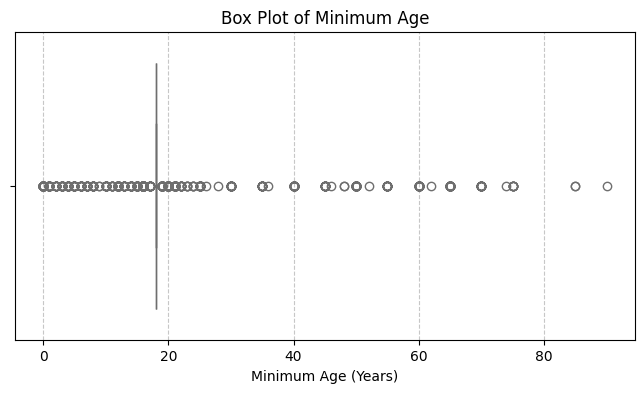

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
file_path = '/Users/krishnasingh/Desktop/Intetrn_Project/Final_Dataset_With_Duration.csv'
df = pd.read_csv(file_path)

# Display basic info
display(df.head())

def plot_top_10(column, title, xlabel):
    top_10 = df[column].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_10.values, y=top_10.index, hue=None, legend=False, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(column)
    plt.show()

# Top 10 Sponsors
plot_top_10('Sponsor/Collaborators', 'Top 10 Sponsors', 'Count')

# Top 10 Countries of Study
plot_top_10('Country', 'Top 10 Countries of Study', 'Count')

# Ensure 'Total Days Taken' is numeric
df["Total Days Taken"] = pd.to_numeric(df["Total Days Taken"], errors="coerce")

# Drop NaN values
cleaned_days = df["Total Days Taken"].dropna()

# Define categories based on duration
bins = [0, 30, 90, 180, 365, float("inf")]
labels = ["<30 days", "30-90 days", "90-180 days", "180-365 days", ">365 days"]
df["Duration Category"] = pd.cut(cleaned_days, bins=bins, labels=labels, include_lowest=True)

# Count occurrences
category_counts = df["Duration Category"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=["lightblue", "lightgreen", "orange", "red", "purple"])
plt.title("Distribution of Total Days Taken for Study")
plt.show()

# Study Type Analysis (Top 3 only)
if 'Study Type' in df.columns:
    top_3_study_types = df['Study Type'].value_counts().head(3)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_3_study_types.values, y=top_3_study_types.index, palette='coolwarm')
    plt.title('Top 3 Study Type Distribution')
    plt.xlabel('Count')
    plt.ylabel('Study Type')
    plt.show()

# Function to plot top 10 categories
def plot_top_10(column, title, xlabel):
    top_10 = df[column].value_counts().head(10)
    
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
    
    # Add value labels to bars
    for index, value in enumerate(top_10.values):
        ax.text(value + 0.5, index, str(value), va='center')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(column)
    plt.show()

# Generalized Condition Analysis
if 'Generalized Condition' in df.columns:
    plot_top_10('Generalized Condition', 'Top 10 Generalized Conditions', 'Count')


# Comprehensive Condition Analysis
condition_columns = ['Conditions.1', 'Conditions.2', 'Conditions.3', 'Conditions.4', 'Conditions.5', 'Conditions.6', 'Conditions.7']
conditions = pd.concat([df[col] for col in condition_columns if col in df.columns], ignore_index=True).dropna()
top_conditions = conditions.value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='magma')
plt.title('Top 10 Conditions from All Columns')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()


# Function to extract min and max age
def extract_age_range(age_str):
    """
    Extracts the minimum and maximum age from the given age string.
    Returns a tuple (min_age, max_age) where max_age can be None for "and older" cases.
    """
    age_str = str(age_str).lower().replace("\xa0", "")  # Remove special spaces

    # Match cases like "18 Years to 75 Years"
    match_range = re.search(r"(\d+)\s*years?\s*to\s*(\d+)\s*years?", age_str)
    if match_range:
        return int(match_range.group(1)), int(match_range.group(2))

    # Match cases like "18 Years and older"
    match_older = re.search(r"(\d+)\s*years?\s*and\s*older", age_str)
    if match_older:
        return int(match_older.group(1)), None

    # Match cases like "Up to 99 Years"
    match_up_to = re.search(r"up to\s*(\d+)\s*years?", age_str)
    if match_up_to:
        return 0, int(match_up_to.group(1))

    return None, None  # Default if no match

# Apply function to extract min and max age
df[["Min Age", "Max Age"]] = df["Age"].apply(lambda x: pd.Series(extract_age_range(x)))

# Convert Min Age to numeric, dropping NaN values
age_data = df["Min Age"].dropna()

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(age_data, bins=20, kde=True, color="skyblue")
plt.xlabel("Minimum Age (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Minimum Age in Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=age_data, color="lightcoral")
plt.xlabel("Minimum Age (Years)")
plt.title("Box Plot of Minimum Age")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
